<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Séries Temporais 

##Extração e Visualização dos dados.

In [1]:
#Baixar as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()
%matplotlib inline

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

from pandas_datareader import data as wb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [0]:
#Desconsiderar mensagem de warning.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [0]:
!pip install -U -q pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [0]:
#df = pd.read_excel("/content/drive/My Drive/DataFrames/JBSS.xlsx")
#df


In [0]:
#df['Data'] = df['Data'].dt.strftime('"%m-%d-%Y"')
#df

In [7]:
#Entradas.
ativo = ["BOVA11.SA"]
data_inicio = "2019-01-01"
data_termino = None

#Carregar o Dataset.
#df = wb.get_data_yahoo("BOVA11.SA", start="2018-01-01", end="2019-01-01", index = "Date")["Adj Close"]
df = wb.DataReader( ativo, data_source = "yahoo", start = data_inicio, end = data_termino)["Adj Close"]
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
Name: Adj Close, dtype: float64

In [8]:
df.index = pd.to_datetime(df.index, format="%m-%d-%Y")
#df.drop("Date", axis=1, inplace=True)

df

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
                ...    
2020-05-13    75.150002
2020-05-14    76.250000
2020-05-15    74.559998
2020-05-18    78.349998
2020-05-19    77.650002
Name: Adj Close, Length: 340, dtype: float64

In [0]:
#f['Data'] = pd.to_datetime(df['Data'], format= )


In [0]:
#from datetime import datetime
#df["Data"] = pd.to_datetime(df["Data"], infer_datetime_format=True)

#index_data = df.set_index(["Data"])
#index_data.head()

#df.index = pd.to_datetime(df["Data"])
#df.drop(df["Data"], axis=1, inplace=True)
#df.head()

In [11]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', name='Date', length=340, freq=None)

In [0]:
#Transformar o index em datetime.


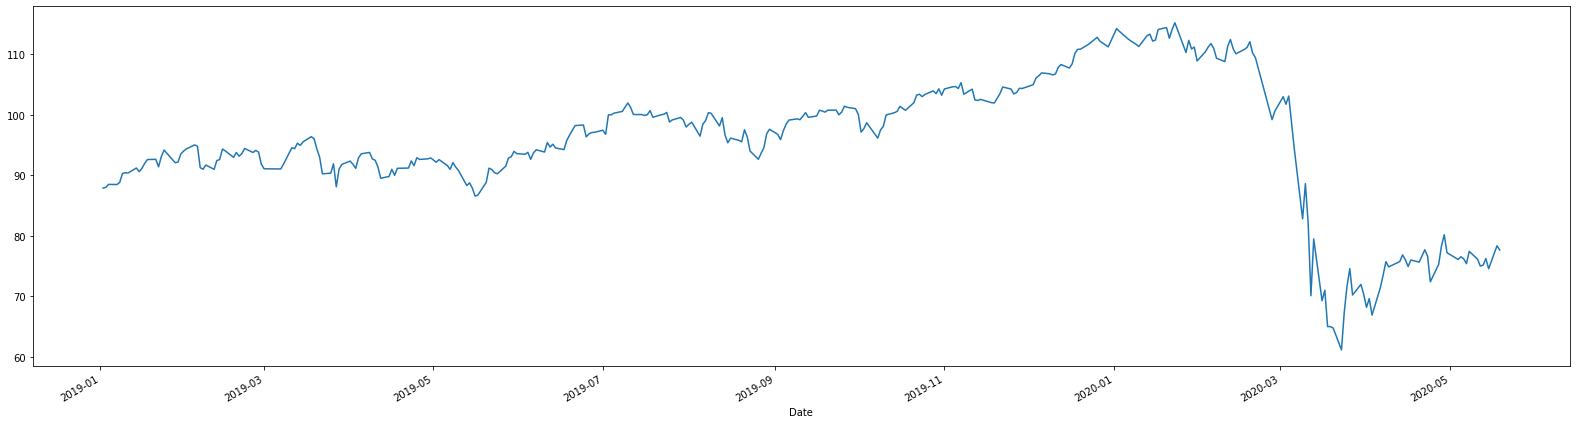

In [13]:
#Visualizacao do meu conjunto de dados.
df.plot(figsize = (22,6));
#df.rolling(9).mean().plot()
#ax.legend([ ativo , "MM9"])
#ax.set_title(ativo)
plt.tight_layout();


### 3. Como decompor uma Time Series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose

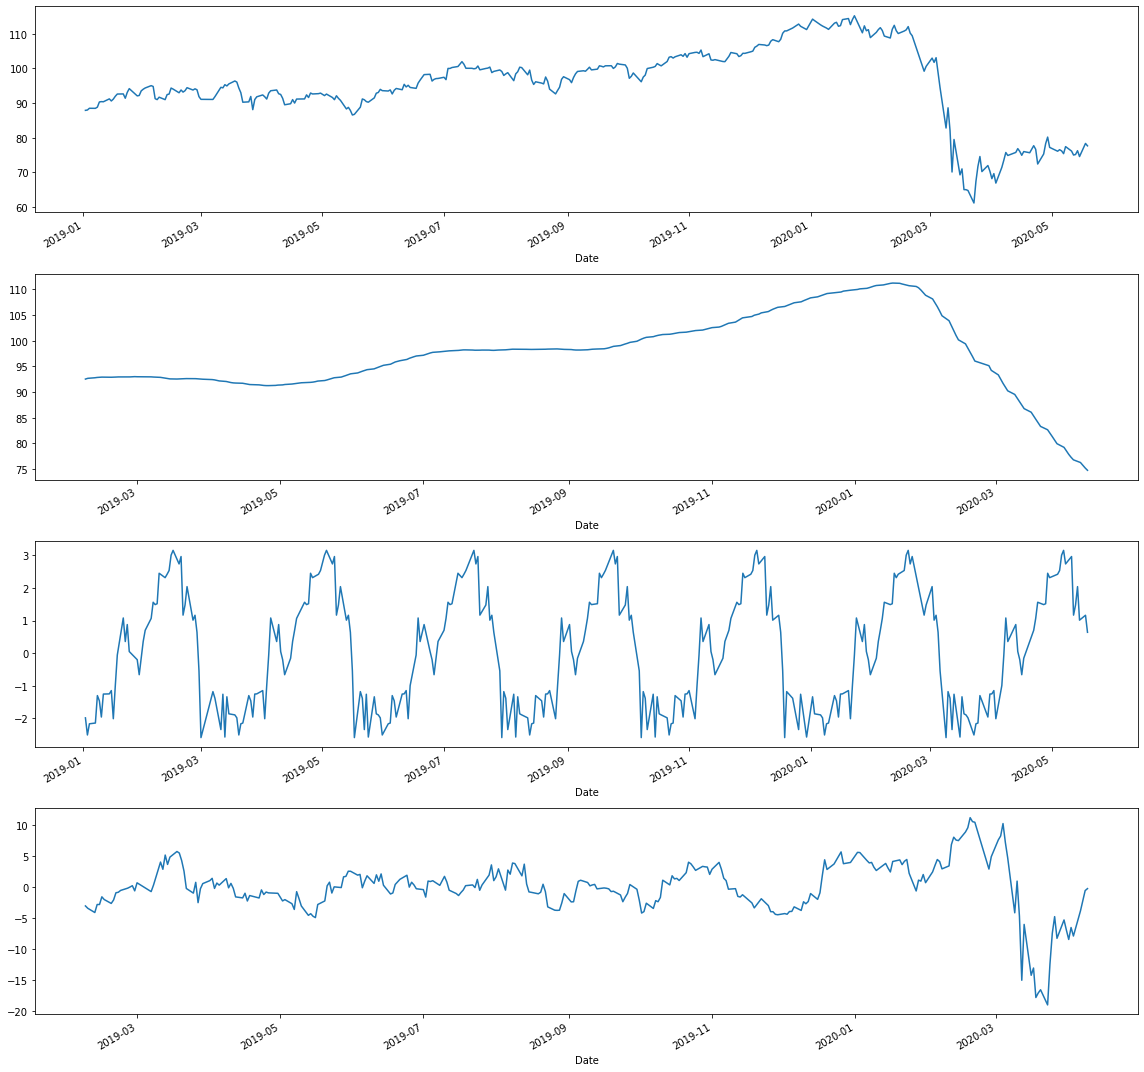

In [14]:
#Salvar a decomposicao em result.
result = seasonal_decompose(df, freq= 50)

#Plotar a decomposicao
#result.plot();
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=( 16,15))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()


In [15]:
df

Date
2019-01-02    87.900002
2019-01-03    88.000000
2019-01-04    88.500000
2019-01-07    88.480003
2019-01-08    88.830002
                ...    
2020-05-13    75.150002
2020-05-14    76.250000
2020-05-15    74.559998
2020-05-18    78.349998
2020-05-19    77.650002
Name: Adj Close, Length: 340, dtype: float64

In [20]:
df2 = df1["Adj Close"].pct_change()
df2

0           NaN
1      0.001138
2      0.005682
3     -0.000226
4      0.003956
         ...   
335    0.002000
336    0.014637
337   -0.022164
338    0.050832
339   -0.008934
Name: Adj Close, Length: 340, dtype: float64

In [0]:
df1 = df.reset_index()

In [21]:
df1

,Date,Adj Close
0,2019-01-02,87.900002
1,2019-01-03,88.000000
2,2019-01-04,88.500000
3,2019-01-07,88.480003
4,2019-01-08,88.830002
...,...,...
335,2020-05-13,75.150002
336,2020-05-14,76.250000
337,2020-05-15,74.559998
338,2020-05-18,78.349998


In [22]:
df1["Date"]

0     2019-01-02
1     2019-01-03
2     2019-01-04
3     2019-01-07
4     2019-01-08
         ...    
335   2020-05-13
336   2020-05-14
337   2020-05-15
338   2020-05-18
339   2020-05-19
Name: Date, Length: 340, dtype: datetime64[ns]

In [0]:
df1.Date = pd.to_datetime(df1.Date, format = "%d-%m-%Y")

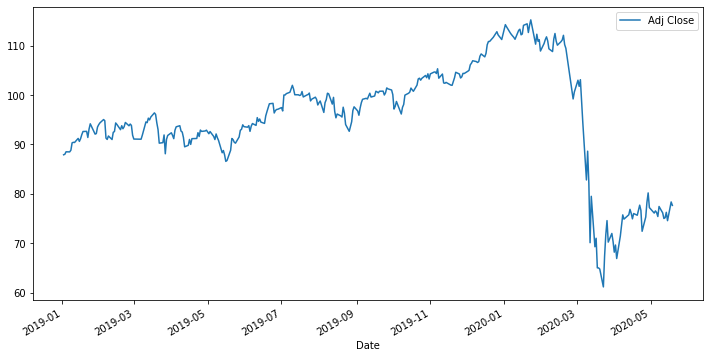

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
df1.plot(x= "Date", y= "Adj Close", ax=ax)

In [26]:
df1.retorno = df1["Adj Close"].pct_change()
df1.retorno

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0           NaN
1      0.001138
2      0.005682
3     -0.000226
4      0.003956
         ...   
335    0.002000
336    0.014637
337   -0.022164
338    0.050832
339   -0.008934
Name: Adj Close, Length: 340, dtype: float64

In [27]:
 frames = [df1,df2]
 result = pd.concat(frames, axis = 1)
result.tail()

,Date,Adj Close,Adj Close
335,2020-05-13,75.150002,0.002000
336,2020-05-14,76.250000,0.014637
337,2020-05-15,74.559998,-0.022164
338,2020-05-18,78.349998,0.050832
339,2020-05-19,77.650002,-0.008934


In [28]:
result["Date"].dtypes

dtype('<M8[ns]')

In [29]:
result['year'] = result.Date.dt.year
result['month'] = result.Date.dt.month
result['day'] = result.Date.dt.day
result['dayofweek'] = result.Date.dt.dayofweek



result.head(10)

,Date,Adj Close,Adj Close,year,month,day,dayofweek
0,2019-01-02,87.900002,NaN,2019,1,2,2
1,2019-01-03,88.000000,0.001138,2019,1,3,3
2,2019-01-04,88.500000,0.005682,2019,1,4,4
3,2019-01-07,88.480003,-0.000226,2019,1,7,0
4,2019-01-08,88.830002,0.003956,2019,1,8,1
5,2019-01-09,90.320000,0.016774,2019,1,9,2
6,2019-01-10,90.419998,0.001107,2019,1,10,3
7,2019-01-11,90.379997,-0.000442,2019,1,11,4
8,2019-01-14,91.209999,0.009183,2019,1,14,0
9,2019-01-15,90.610001,-0.006578,2019,1,15,1


In [58]:
result.groupby('month').plot.bar()


month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f799dfaa0d0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [0]:
result.Count